<a href="https://colab.research.google.com/github/vodnalasricharan/Ineuron.ai/blob/master/BE_Intern_Assignment_Sricharan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install investpy

In [45]:
import investpy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [14]:
df = investpy.get_stock_historical_data(stock='ONGC',
                                        country='India',
                                        from_date='01/01/2010',
                                        to_date='31/12/2020')

In [15]:
df.drop(columns=['Open','High','Low','Volume','Currency'])

,Close
Date,
2010-01-04,197.91
2010-01-05,201.38
2010-01-06,203.92
2010-01-07,204.13
2010-01-08,202.62
...,...
2020-12-24,93.15
2020-12-28,93.80
2020-12-29,93.15


In [28]:
date=df.index

In [30]:
df.reset_index(drop=True,inplace=True)

In [32]:
df['Date']=date

Text(0.5, 1.0, 'ONGC Stock Price 1/1/2010 - 31/12/2020')

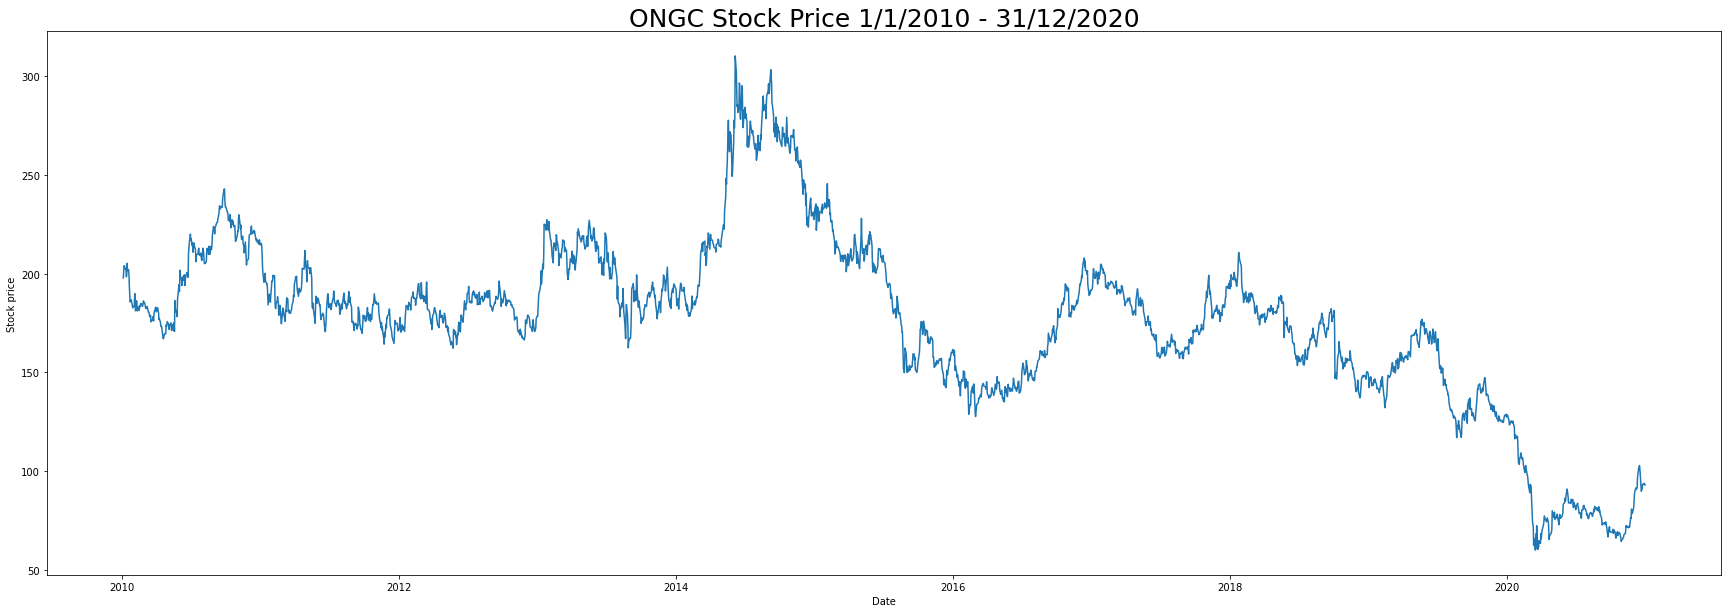

In [73]:
plt.figure(figsize=(30,10))
plt.plot(df['Date'], df['Close'])
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.title("ONGC Stock Price 1/1/2010 - 31/12/2020",fontsize=25)

In [47]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values
#index of 2020-12-31 is 2477
train = dataset[0:2478,:]
valid = dataset[2478:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

2418/2418 - 53s - loss: 0.0014


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


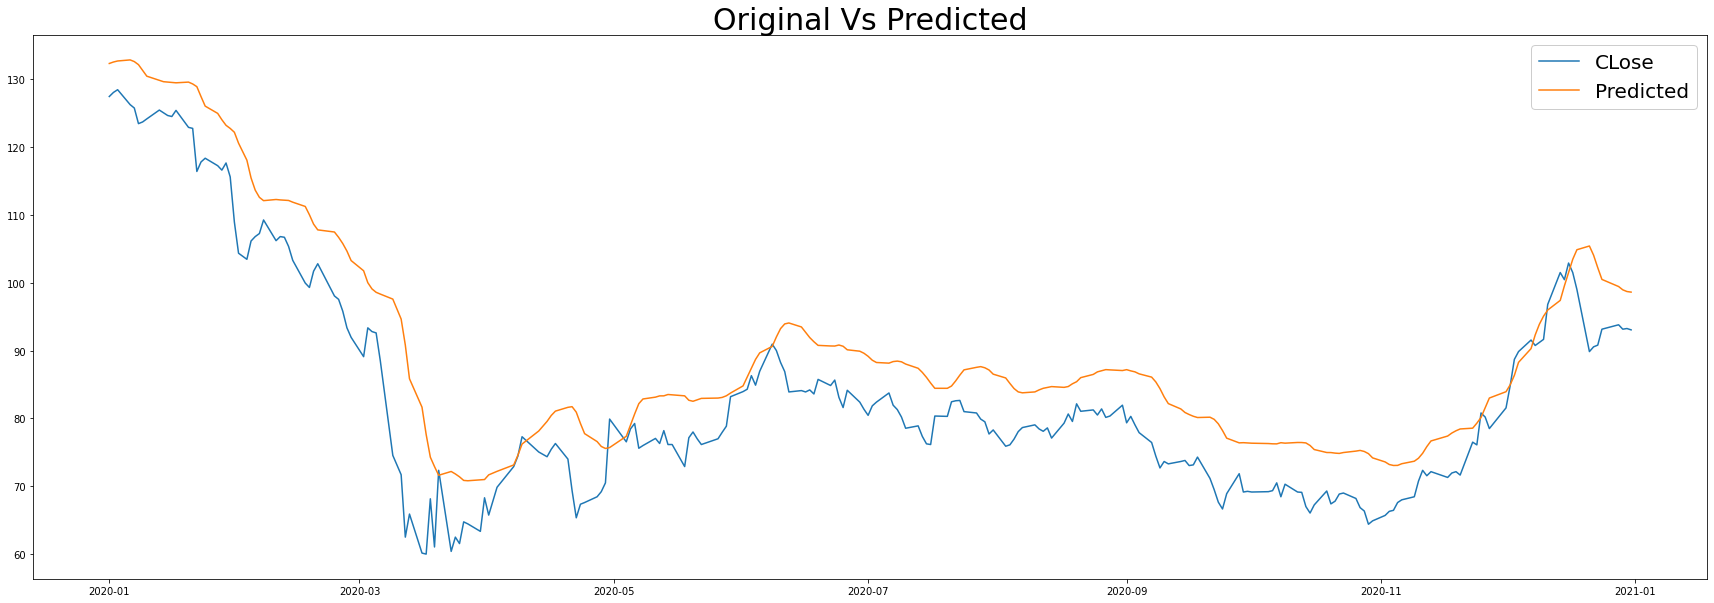

In [71]:
valid = df[2478:]
valid['pred']=closing_price
plt.figure(figsize=(30,10))
plt.title('Original Vs Predicted',fontsize=30)
plt.plot(valid['Date'],valid['Close'], label='CLose')
plt.plot(valid['Date'],valid['pred'], label='Predicted')
plt.legend(framealpha=10, frameon=True,fontsize=20)